In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [17]:

def histogram_equalization(image):
    # Convert image to grayscale if it's not already
    if len(image.shape) > 2:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    
    # Calculate histogram
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    
    # Calculate cumulative distribution function (CDF)
    cdf = hist.cumsum()
    
    # Normalize CDF
    cdf_normalized = cdf * hist.max() / cdf.max()
    
    # Create lookup table
    lut = np.interp(np.arange(256), np.arange(256), cdf_normalized.ravel())
    
    # Apply histogram equalization
    equalized = lut[gray]
    equalized = np.uint8(equalized)
    
    return equalized

# Load an image
image = cv2.imread('lena.png')

# Perform histogram equalization
equalized = histogram_equalization(image)

# Calculate histograms
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized], [0], None, [256], [0, 256])


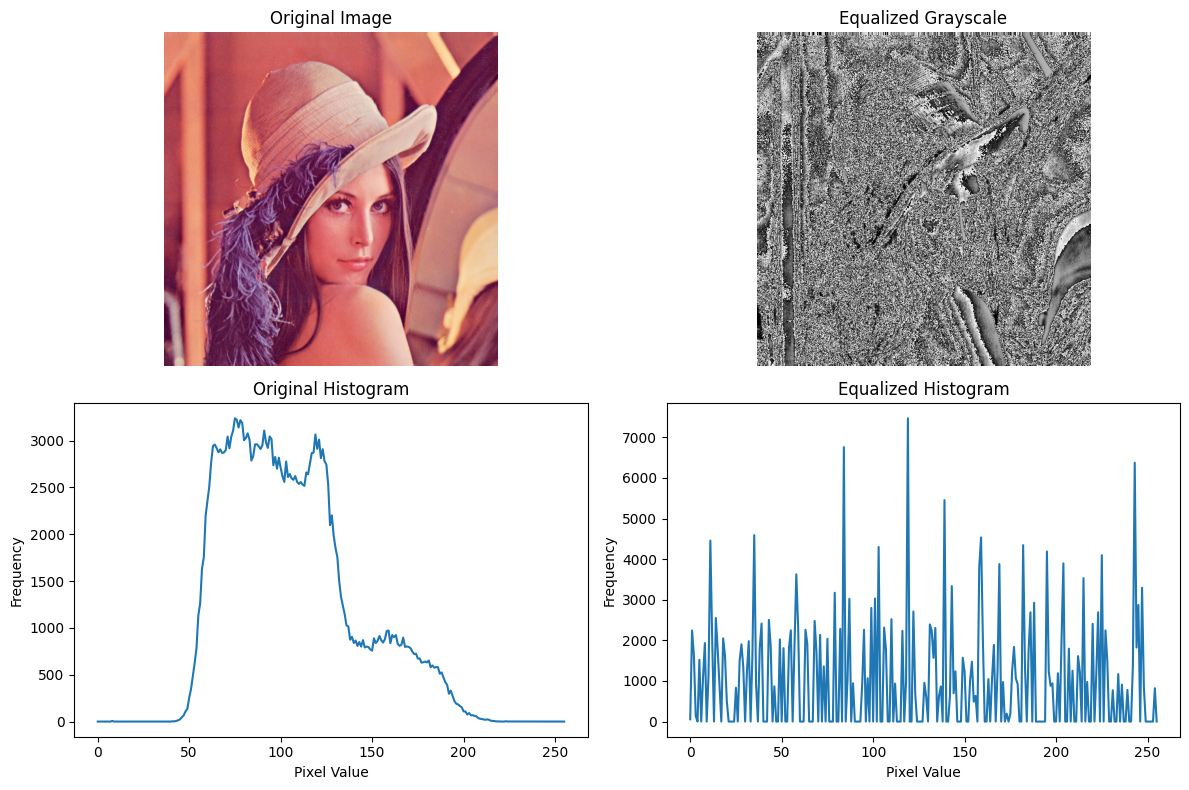

In [18]:

# Plotting
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Equalized image
plt.subplot(2, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.title('Equalized Grayscale')
plt.axis('off')

# Original histogram
plt.subplot(2, 2, 3)
plt.plot(hist_original)
plt.title('Original Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Equalized histogram
plt.subplot(2, 2, 4)
plt.plot(hist_equalized)
plt.title('Equalized Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

* YUV is a color encoding system used in various image and video processing applications. It's an alternative to the more common RGB (Red, Green, Blue) color space. Let me break it down for you:

#### Components of YUV:

Y: Luminance (brightness)
U and V: Chrominance (color information)


RGB: Each pixel is represented by levels of Red, Green, and Blue.
YUV: Separates intensity (Y) from color information (U and V).


The Components in Detail:

Y (Luminance): Represents the brightness of the image. It's a weighted sum of R, G, and B values.
U (Blue - Luminance): Represents the difference between blue and luminance.
V (Red - Luminance): Represents the difference between red and luminance.


> Formula for conversion from RGB to YUV

* Y = 0.299R + 0.587G + 0.114B
* U = -0.147R - 0.289G + 0.436B
* V = 0.615R - 0.515G - 0.100B



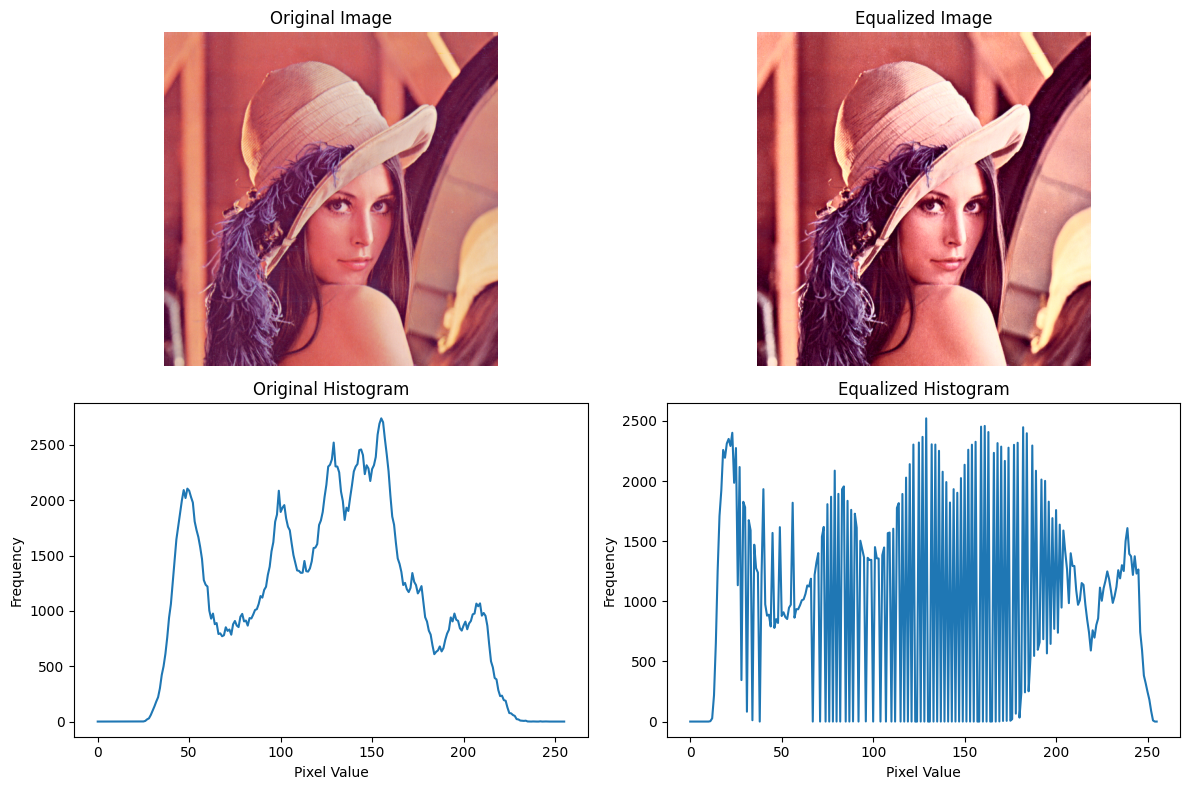

In [19]:

def histogram_equalization(image):
    if len(image.shape) == 2:
        # Grayscale image
        return cv2.equalizeHist(image)
    elif len(image.shape) == 3:
        # Color image
        yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
        yuv[:,:,0] = cv2.equalizeHist(yuv[:,:,0])
        return cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)
    else:
        raise ValueError("Unsupported image dimension")

# Load an image
image = cv2.imread('lena.png')

# Perform histogram equalization
equalized = histogram_equalization(image)

# Calculate histograms
if len(image.shape) == 2:
    # Grayscale image
    hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_equalized = cv2.calcHist([equalized], [0], None, [256], [0, 256])
else:
    # Color image - use only the luminance channel
    hist_original = cv2.calcHist([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)], [0], None, [256], [0, 256])
    hist_equalized = cv2.calcHist([cv2.cvtColor(equalized, cv2.COLOR_BGR2GRAY)], [0], None, [256], [0, 256])

# Plotting
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Equalized image
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(equalized, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')
plt.axis('off')

# Original histogram
plt.subplot(2, 2, 3)
plt.plot(hist_original)
plt.title('Original Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Equalized histogram
plt.subplot(2, 2, 4)
plt.plot(hist_equalized)
plt.title('Equalized Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()